**PROBLEM STATEMENT**

<p><br></p>
<p>A-Mart is one of the famous e-commerce platforms that have multiple products listed on its website. Currently, &ldquo;A-Mart&rdquo;&nbsp; is doing well and they have a 100% target achieved from the previous financial year. In order to achieve the target for the next financial year one of the objectives is to target the current active customer behavior on the platform so that the company can strategize on generating revenue through selling the product &amp; advertising well. On the uber level, CXO wants to generate revenue via two methods.</p>
<ol>
    <li>
        <p>Understand my customer base - who are my customers, get RFM - Recency, Frequency, Monetary - what are the distinct segments of customers &amp; what is their lifetime value</p>
    </li>
    <li>
        <p>Depending on the customer&apos;s behavior - (1) schedule notifications at the right time w/ popular product categories and (2) control personalized discounts based on customers&apos; value and purchasing patterns</p>
    </li>
</ol>

## 1.0 Import the necessary libraries 

In [4]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import seaborn as sns
import matplotlib.pyplot as plt

## 2.0 Import data 

In [5]:
df = pd.read_csv('EDA.csv')

## 3.0 Descriptive Analysis

#### 3.1 Display the First & Last 5 rows in order to check the data is imported properly

In [6]:
df.head()

,CUSTOMER_ID,EMAIL_ID,FIRST_NAME,LAST_NAME,OCCUPATION,AGE,AGE_CATEGORY,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,...,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE
0,2333,lisa10@example.net,Brian,Higgins,Student,25,20-29,61,34847.4,571.27,...,12946.20,8109.45,11,3,29,18,2293.90,1809.47,17749.00,12995.00
1,2334,jasonmacdonald@example.com,David,Adams,Blue-Collar,41,40-49,59,32487.0,550.63,...,9094.21,7755.92,7,36,15,1,1350.28,23832.80,6893.93,410.00
2,2335,richardsummers@example.com,Leslie,Jones,Clerical,38,30-39,53,24179.0,456.21,...,6431.97,3879.00,0,34,18,1,0.00,16031.00,7996.99,151.00
3,2336,elizabethroberson@example.net,Donald,Ayers,Student,18,19 & below,84,18554.5,220.89,...,5609.60,5117.11,2,46,22,14,140.98,11795.40,4557.05,2061.06
4,2337,christina06@example.org,Jeremy,Williams,Student,19,19 & below,26,16885.0,649.42,...,2265.46,8274.97,13,4,6,3,7700.24,1945.00,4751.96,2487.79


In [7]:
df.tail()

,CUSTOMER_ID,EMAIL_ID,FIRST_NAME,LAST_NAME,OCCUPATION,AGE,AGE_CATEGORY,TOTAL_ORDERS,REVENUE,AVERAGE_ORDER_VALUE,...,WEEK3_DAY16_DAY23_REVENUE,WEEK4_DAY24_DAY31_REVENUE,TIME_0000_0600_ORDERS,TIME_0601_1200_ORDERS,TIME_1200_1800_ORDERS,TIME_1801_2359_ORDERS,TIME_0000_0600_REVENUE,TIME_0601_1200_REVENUE,TIME_1200_1800_REVENUE,TIME_1801_2359_REVENUE
4995,251041,stevenwilson@example.org,Robert,Lee,Clerical,34,30-39,2,59.95,29.98,...,0.00,0.00,0,1,0,1,0.0,55.00,0.00,4.95
4996,251042,gallegosdebbie@example.net,Amanda,Harrison,Manager,48,40-49,2,59.94,29.97,...,0.00,54.99,0,0,1,1,0.0,0.00,54.99,4.95
4997,261374,melissa67@example.org,Jeffrey,Haynes,Student,25,20-29,2,51.94,25.97,...,46.99,0.00,0,1,0,1,0.0,4.95,0.00,46.99
4998,268356,lisaholland@example.net,Pamela,Flores,Doctor,51,50 and above,2,45.94,22.97,...,0.00,0.00,0,0,2,0,0.0,0.00,45.94,0.00
4999,279492,poolegregory@example.com,Lisa,Brown,Professional,41,40-49,3,38.50,12.83,...,9.90,28.60,0,0,3,0,0.0,0.00,38.50,0.00


#### 3.2 Check the shape of the data

In [8]:
df.shape

(5000, 46)

#### 3.3. Check for duplicate entries in the data

In [9]:
df.duplicated().sum()

0

The data which we have stored in the database seems to be cleaned, so the value is displayed as "**0**"

#### 3.4 Check the statistical summary of the data

In [10]:
df. describe().T

,count,mean,std,min,25%,50%,75%,max
CUSTOMER_ID,5000.0,43041.227800,49949.848017,2333.00,4019.5000,16097.000,74223.5000,279492.00
AGE,5000.0,34.070800,12.635621,17.00,24.0000,30.000,44.0000,62.00
TOTAL_ORDERS,5000.0,12.870400,12.679880,1.00,3.0000,8.000,20.0000,156.00
REVENUE,5000.0,1681.523848,1998.618797,38.50,315.0975,966.725,2493.0725,34847.40
AVERAGE_ORDER_VALUE,5000.0,136.537378,91.651569,10.68,83.0250,113.160,160.2725,1578.88
CARRIAGE_REVENUE,5000.0,46.036376,47.879226,0.00,9.9800,24.985,76.8625,529.59
AVERAGESHIPPING,5000.0,3.592574,2.021360,0.00,2.5000,3.660,4.7900,35.99
AVGDAYSBETWEENORDERS,5000.0,163.159618,259.699496,0.00,21.6700,57.635,170.3575,1409.50
DAYSSINCELASTORDER,5000.0,87.420000,80.156513,1.00,7.0000,68.000,171.2500,207.00
MONDAY_ORDERS,5000.0,1.629000,2.236506,0.00,0.0000,1.000,2.0000,19.00


**Observation:**

1. From the above statistical summary its observed that almost every column has outliers expect for "DAYSSINCELASTORDER" and "AGE".
Note:  Here we can ignore CUSTOMER_ID Since its the unique ID of the customer.
2. 75% of the orders have order value less than 160$.
3. Less than 50% of the customer have purchase frequency less than 60-days(2 months)




## 4.0 Uni-Variate Analysis

#### 4.1 What is the age distribution of customers?

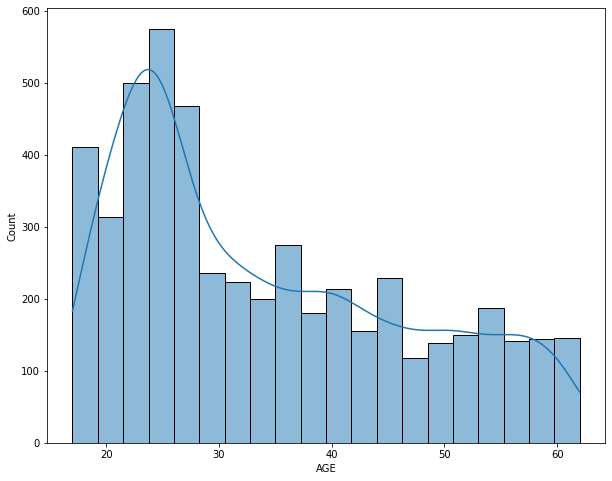

In [11]:
plt.figure(figsize = (10, 8))
sns.histplot(x = 'AGE', data = df, kde = True)
plt.show()

**Observations**

- It can be seen that maximum customers are of age 10  to 30.





#### 4.2 What is the distribution of total orders?

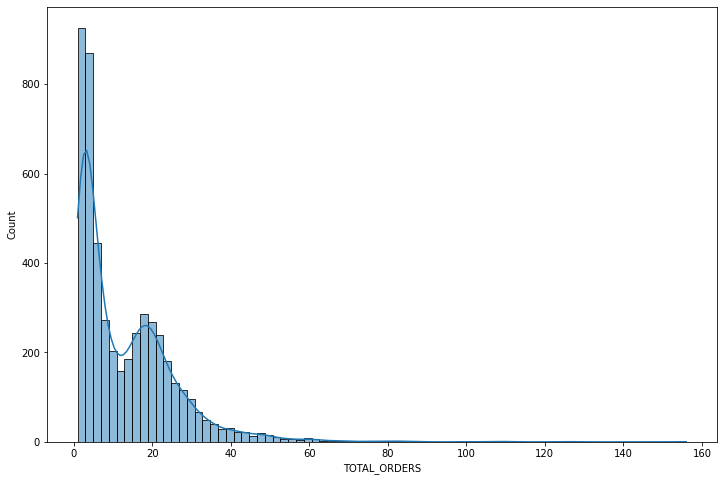

In [12]:
plt.figure(figsize = (12, 8))
sns.histplot(x = 'TOTAL_ORDERS', data = df, kde = True)
plt.show()

#### 4.3 What is the distribution across Revenue

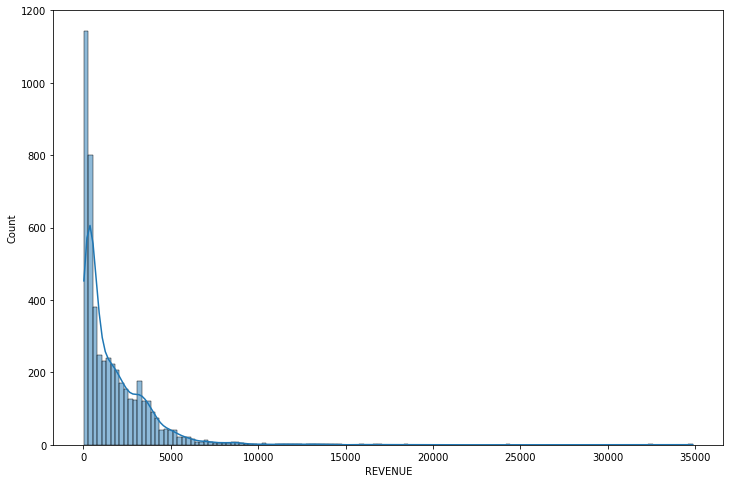

In [13]:
plt.figure(figsize = (12, 8))
sns.histplot(x = 'REVENUE', data = df, kde = True)
plt.show()

#### 4.4 What is the distribution of Average Order Value?

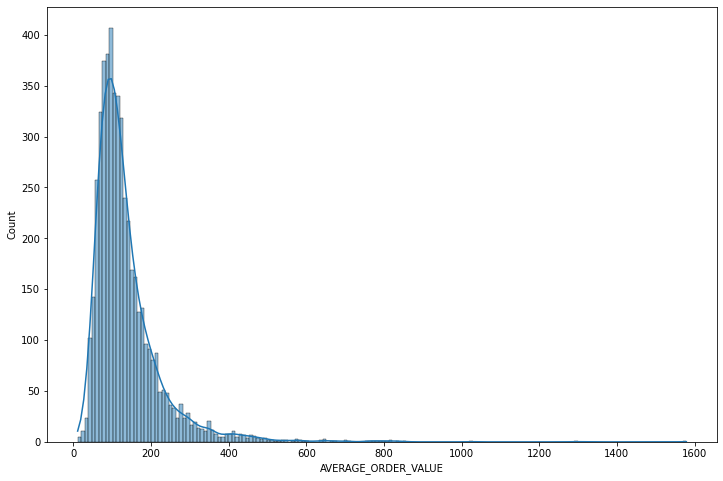

In [14]:
plt.figure(figsize = (12, 8))
sns.histplot(x = 'AVERAGE_ORDER_VALUE', data = df, kde = True)
plt.show()

**Observations**

- It can be seen that, in general, the average order value lies between 10 and 300. Some of the orders have a high price value.

#### 4.5 What is the distribution of customer purchase frequency?

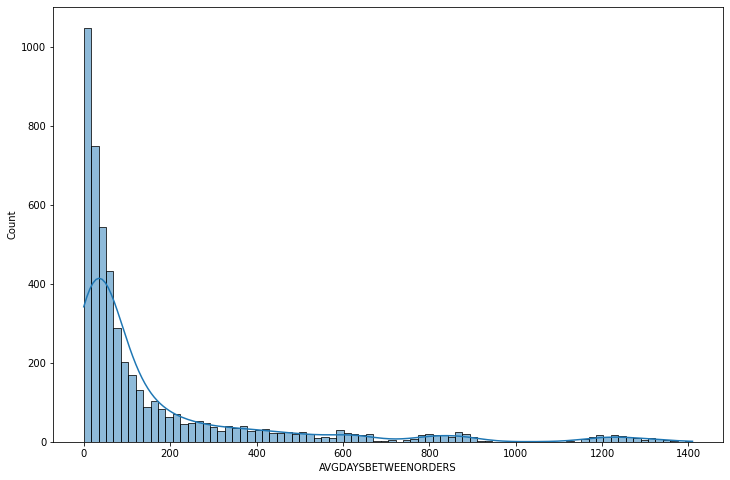

In [15]:
plt.figure(figsize = (12, 8))
sns.histplot(x = 'AVGDAYSBETWEENORDERS', data = df, kde = True)
plt.show()

**Observations**

It can be seen that, mostly, the average number of days between orders is somewhere between 0 and 100.

#### 4.6. What is the distribution of days since last order from a customer?

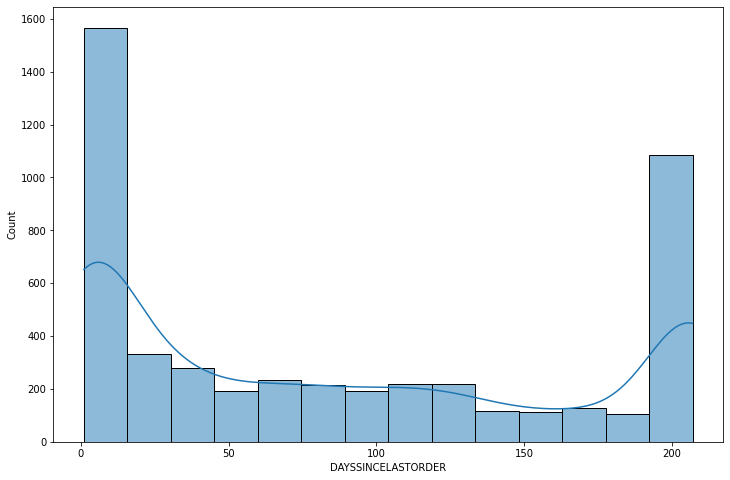

In [16]:
plt.figure(figsize = (12, 8))
sns.histplot(x = 'DAYSSINCELASTORDER', data = df, kde = True)
plt.show()

**Observations**

1. From the graph its observed that approximately 30% of the customer have ordered recently (1 - 15 days)
2. At the same time there are approximately 20% of customers recent order it more than a 6months



## 5.0 Answering specific business questions

#### 5.1 What is the distribution of customers across Occupation?

In [17]:
def func(x):
  return str(x * 100 / 5000) + "%"
temp1 = pd.DataFrame(df.groupby('OCCUPATION')['CUSTOMER_ID'].count())
temp1['Count_Perc'] = temp1.CUSTOMER_ID.apply(func)
temp1.rename(columns = {'CUSTOMER_ID':'Customer_Count'}, inplace = True)
temp1

,Customer_Count,Count_Perc
OCCUPATION,,
Blue-Collar,999,19.98%
Clerical,551,11.02%
Doctor,440,8.8%
Home Maker,622,12.44%
Lawyer,564,11.28%
Manager,278,5.56%
Professional,830,16.6%
Student,716,14.32%


**Observations**

- It can be seen that the maximum customers' occupations are blue-collar, followed by professionals and students.

#### 5.2 What is the distribution of customers across Age?

In [18]:
temp2 = pd.DataFrame(df.groupby('AGE_CATEGORY')['CUSTOMER_ID'].count())
temp2['Count_Perc'] = temp2.CUSTOMER_ID.apply(func)
temp2.rename(columns = {'CUSTOMER_ID':'Customer_Count'}, inplace = True)
temp2

,Customer_Count,Count_Perc
AGE_CATEGORY,,
19 & below,411,8.22%
20-29,1971,39.42%
30-39,997,19.94%
40-49,785,15.7%
50 and above,836,16.72%


**Observations**

1.   From the above table, it is observed that around 39.66% of the customers are between the age categories of 20-29.



#### 5.3 What is the distribution of revenue across Occupation?

In [19]:
def func2(x):
  return str(round(x * 100 / df.REVENUE.sum(), 2)) + "%"
temp3 = temp1[:]
temp3.drop('Customer_Count', axis = 1, inplace = True)
temp3['Sum_of_Revenue'] = df.groupby('OCCUPATION')['REVENUE'].sum()
temp3['Perc_of_Revenue'] = temp3['Sum_of_Revenue'].apply(func2)
temp3

/var/folders/w0/nbsnlqqd60s_jl5jwcqh9d7r0000gn/T/ipykernel_5089/532838018.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp3.drop('Customer_Count', axis = 1, inplace = True)


,Count_Perc,Sum_of_Revenue,Perc_of_Revenue
OCCUPATION,,,
Blue-Collar,19.98%,1709897.27,20.34%
Clerical,11.02%,951856.90,11.32%
Doctor,8.8%,696159.08,8.28%
Home Maker,12.44%,1076129.18,12.8%
Lawyer,11.28%,935189.04,11.12%
Manager,5.56%,514869.63,6.12%
Professional,16.6%,1326178.25,15.77%
Student,14.32%,1197339.89,14.24%


From the table its observed that there is 20.34% revenue contribution from the customer who are in Blue-Collar job and the lowest is from the occupation manager that is 6.12% 

#### 5.4 What is the distribution of revenue across Age?

In [20]:
temp_age = temp2[:]
temp_age.drop('Customer_Count', axis = 1, inplace = True)
temp_age['sum_of_revenue'] = df.groupby('AGE_CATEGORY')['REVENUE'].sum()
temp_age['perc_of_revenue'] = temp_age['sum_of_revenue'].apply(func2)
temp_age

/var/folders/w0/nbsnlqqd60s_jl5jwcqh9d7r0000gn/T/ipykernel_5089/4268068277.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_age.drop('Customer_Count', axis = 1, inplace = True)


,Count_Perc,sum_of_revenue,perc_of_revenue
AGE_CATEGORY,,,
19 & below,8.22%,662526.05,7.88%
20-29,39.42%,3194460.53,37.99%
30-39,19.94%,2198533.40,26.15%
40-49,15.7%,1746003.32,20.77%
50 and above,16.72%,606095.94,7.21%


**Observations**

1. From the graph its observed that 38.14% Revenue is generated from customer whose age category is between 20-29

#### 5.5 What is the distribution of High, Medium and Low value customers based on average order value?

In [21]:
def func3(x):
  if x > 0 and x <= 100 :
    return "Low"
  elif x > 100 and x <= 300:
    return "Medium"
  else:
    return "High"

df['order_bucket'] = df.AVERAGE_ORDER_VALUE.apply(func3)
temp4 = pd.DataFrame(df.order_bucket.value_counts())
temp4.columns = ['Customer_Count']
temp4.index.name = 'Order_Bucket_Cat'
temp4["customer_count_perc"] = temp4.Customer_Count.apply(func)
temp4

,Customer_Count,customer_count_perc
Order_Bucket_Cat,,
Medium,2767,55.34%
Low,1993,39.86%
High,240,4.8%


**Observations**

1. From the above table, it is observed that we have around 55.34% of the people having medium order value, which is good for business. But this data gives only the average, so we can assume that it is not highly skewed.

#### 5.6 What is the % of our most frequent customers? (those who order again within 0 to 14 days?)

In [22]:
def func4(x):
  if x >= 0 and x <= 7:
    return "0-7"
  elif x >= 8 and x <= 14:
    return "8-14"
  elif x >= 15 and x <= 28:
    return "15-28"
  elif x >= 28 and x <= 56:
    return "28-56"
  else:
    return "56+"

df['avgdaysbetweenorders_bucket'] = df.AVGDAYSBETWEENORDERS.apply(func4)
temp5 = pd.DataFrame(df.avgdaysbetweenorders_bucket.value_counts(), 
                     index = ["0-7", "8-14", "15-28", "28-56", "56+"])
temp5.columns = ['Customer_Count']
temp5.index.name = 'Avg_Days_Btw_Ord_Bucket_Cat'
temp5["customer_count_perc"] = temp5.Customer_Count.apply(func)
temp5

,Customer_Count,customer_count_perc
Avg_Days_Btw_Ord_Bucket_Cat,,
0-7,680,13.6%
8-14,221,4.42%
15-28,578,11.56%
28-56,927,18.54%
56+,2594,51.88%


**Observations**

1.   From the above table its observed that there are more than 50% of the customers are having more than 56 days of order frequency.



#### 5.7 What is the % of our dark* users? 

**customers who are inactive for 56+ days since their last purchase *italicized text*

In [23]:
df['dayssincelastorder_bucket'] = df.DAYSSINCELASTORDER.apply(func4)
temp6 = pd.DataFrame(df.dayssincelastorder_bucket.value_counts(), 
                     index = ["0-7", "8-14", "15-28", "28-56", "56+"])
temp6.columns = ['Customer_Count']
temp6.index.name = 'Day_Since_Last_Order_Bucket_Cat'
temp6["customer_count_perc"] = temp6.Customer_Count.apply(func)
temp6

,Customer_Count,customer_count_perc
Day_Since_Last_Order_Bucket_Cat,,
0-7,1279,25.58%
8-14,265,5.3%
15-28,322,6.44%
28-56,467,9.34%
56+,2667,53.34%


**Observations**

1. Here as well, there are 53.34% of the customer haven't placed any orders for more than 56 days. This needs to be investigated further!

#### 5.8 Are there specific weeks in a month where customer orders and revenue is higher compared to other weeks?

In [24]:
def ord_perc(x):
  return str(round(x * 100 / df["TOTAL_ORDERS"].sum(), 2)) + "%"

temp7 = df[['WEEK1_DAY01_DAY07_ORDERS',
       'WEEK2_DAY08_DAY15_ORDERS', 'WEEK3_DAY16_DAY23_ORDERS',
       'WEEK4_DAY24_DAY31_ORDERS', 'WEEK1_DAY01_DAY07_REVENUE',
       'WEEK2_DAY08_DAY15_REVENUE', 'WEEK3_DAY16_DAY23_REVENUE',
       'WEEK4_DAY24_DAY31_REVENUE']]
temp7
temp7_df = pd.DataFrame([[0,1,2,3], [0,1,3], [0,1,2], [0,1,2]], index = ["Week1", "Week2", "Week3", "Week4"])
temp7_df.index.name = "Weeks"
temp7_df.columns = ["Sum_of_Orders", "Perc_Order", "Sum_of_Rev", "Perc_Rev"]

temp7_df.at["Week1", "Sum_of_Orders"] = temp7["WEEK1_DAY01_DAY07_ORDERS"].sum()
temp7_df.at["Week2", "Sum_of_Orders"] = temp7["WEEK2_DAY08_DAY15_ORDERS"].sum()
temp7_df.at["Week3", "Sum_of_Orders"] = temp7["WEEK3_DAY16_DAY23_ORDERS"].sum()
temp7_df.at["Week4", "Sum_of_Orders"] = temp7["WEEK4_DAY24_DAY31_ORDERS"].sum()

temp7_df["Perc_Order"] = temp7_df["Sum_of_Orders"].apply(ord_perc)

temp7_df.at["Week1", "Sum_of_Rev"] = temp7["WEEK1_DAY01_DAY07_REVENUE"].sum()
temp7_df.at["Week2", "Sum_of_Rev"] = temp7["WEEK2_DAY08_DAY15_REVENUE"].sum()
temp7_df.at["Week3", "Sum_of_Rev"] = temp7["WEEK3_DAY16_DAY23_REVENUE"].sum()
temp7_df.at["Week4", "Sum_of_Rev"] = temp7["WEEK4_DAY24_DAY31_REVENUE"].sum()

temp7_df["Perc_Rev"] = temp7_df["Sum_of_Rev"].apply(func2)

temp7_df

,Sum_of_Orders,Perc_Order,Sum_of_Rev,Perc_Rev
Weeks,,,,
Week1,14989,23.29%,1893191.73,22.52%
Week2,15313,23.8%,2032978.68,24.18%
Week3,16150,25.1%,2109134.52,25.09%
Week4,17900,27.82%,2372314.26,28.22%


**Observations**

From the table its observed that there is no much difference in the Order placed & revenue generated based on the week number for a month

#### 5.9 Are there specific points in a day where customers are more likely to place their orders?

In [25]:
temp8 = df[['TIME_0000_0600_ORDERS',
       'TIME_0601_1200_ORDERS', 'TIME_1200_1800_ORDERS',
       'TIME_1801_2359_ORDERS', 'TIME_0000_0600_REVENUE',
       'TIME_0601_1200_REVENUE', 'TIME_1200_1800_REVENUE',
       'TIME_1801_2359_REVENUE']]

temp8_df = pd.DataFrame([[0,1,2,3], [0,1,3], [0,1,2], [0,1,2]], index = ["TIME_0000_0600", "TIME_0601_1200", "TIME_1200_1800", "TIME_1801_2359"])
temp8_df.index.name = "Time Zone"
temp8_df.columns = ["Sum_of_Orders", "Perc_Order", "Sum_of_Rev", "Perc_Rev"]

temp8_df.at["TIME_0000_0600", "Sum_of_Orders"] = temp8["TIME_0000_0600_ORDERS"].sum()
temp8_df.at["TIME_0601_1200", "Sum_of_Orders"] = temp8["TIME_0601_1200_ORDERS"].sum()
temp8_df.at["TIME_1200_1800", "Sum_of_Orders"] = temp8["TIME_1200_1800_ORDERS"].sum()
temp8_df.at["TIME_1801_2359", "Sum_of_Orders"] = temp8["TIME_1801_2359_ORDERS"].sum()

temp8_df["Perc_Order"] = temp8_df["Sum_of_Orders"].apply(ord_perc)

temp8_df.at["TIME_0000_0600", "Sum_of_Rev"] = temp8["TIME_0000_0600_REVENUE"].sum()
temp8_df.at["TIME_0601_1200", "Sum_of_Rev"] = temp8["TIME_0601_1200_REVENUE"].sum()
temp8_df.at["TIME_1200_1800", "Sum_of_Rev"] = temp8["TIME_1200_1800_REVENUE"].sum()
temp8_df.at["TIME_1801_2359", "Sum_of_Rev"] = temp8["TIME_1801_2359_REVENUE"].sum()

temp8_df["Perc_Rev"] = temp8_df["Sum_of_Rev"].apply(func2)

temp8_df

,Sum_of_Orders,Perc_Order,Sum_of_Rev,Perc_Rev
Time Zone,,,,
TIME_0000_0600,5144,7.99%,655313.18,7.79%
TIME_0601_1200,18731,29.11%,2434319.39,28.95%
TIME_1200_1800,22170,34.45%,2923658.12,34.77%
TIME_1801_2359,18307,28.45%,2394328.53,28.48%


**Observations**
1. From the above table its understood that there are more orders are placed and revenue generated between 1200 to 1800 hour. And its very low during 0000 to 0600 hour, because its from midnight to early morning